In [305]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [306]:
df = pd.read_csv(r"C:\Users\Danish\Desktop\Data Science\fraud\Fraud.csv")

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [308]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0


~> Transactions which are not labeled as fraud (isFraud = 0):
   99.87% Value = 6354407 

~> Transactions which are labeled as fraud (isFraud = 1):
   0.13% Value = 8213


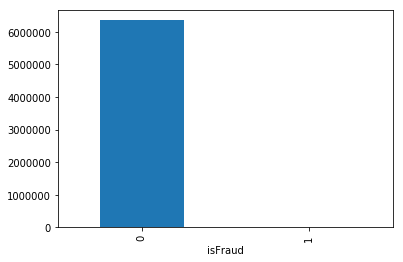

In [309]:
print('~> Transactions which are not labeled as fraud (isFraud = 0):\n   {}% Value = {} '.format(
    100 - round(df['isFraud'].mean()*100, 2),df.groupby("isFraud")["isFraud"].count()[0]))
print('\n~> Transactions which are labeled as fraud (isFraud = 1):\n   {}% Value = {}'.format(
    round(df['isFraud'].mean()*100, 2),df.groupby("isFraud")["isFraud"].count()[1]))

df.groupby("isFraud")["isFraud"].count().plot.bar()
plt.show()

~> Transactions which are not labeled as isFlaggedFraud (isFlaggedFraud = 0):
   100.0% Value = 6362604 

~> Transactions which are labeled as isFlaggedFraud (isFlaggedFraud = 1):
   0.0% Value = 16


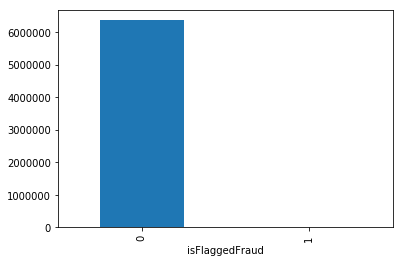

In [310]:
print('~> Transactions which are not labeled as isFlaggedFraud (isFlaggedFraud = 0):\n   {}% Value = {} '.format(
    100 - round(df['isFlaggedFraud'].mean()*100, 2),df.groupby("isFlaggedFraud")["isFlaggedFraud"].count()[0]))
print('\n~> Transactions which are labeled as isFlaggedFraud (isFlaggedFraud = 1):\n   {}% Value = {}'.format(
    round(df['isFlaggedFraud'].mean()*100, 2),df.groupby("isFlaggedFraud")["isFlaggedFraud"].count()[1]))

df.groupby("isFlaggedFraud")["isFlaggedFraud"].count().plot.bar()
plt.show()

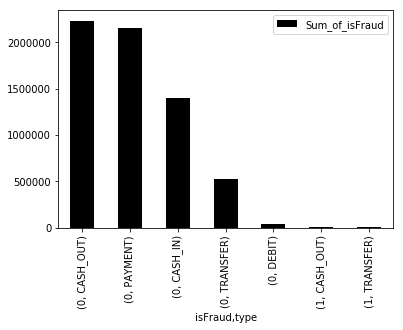

,isFraud,type,Sum_of_isFraud
0,0,CASH_OUT,2233384
1,0,PAYMENT,2151495
2,0,CASH_IN,1399284
3,0,TRANSFER,528812
4,0,DEBIT,41432
5,1,CASH_OUT,4116
6,1,TRANSFER,4097


In [323]:
x=df.groupby(["isFraud"])["type"].value_counts()
x=pd.DataFrame(data=x).rename(columns={"type":"Sum_of_isFraud"})
x.plot.bar(color="#000000")
x.reset_index(inplace=True)
plt.show()
x.head(len(x))

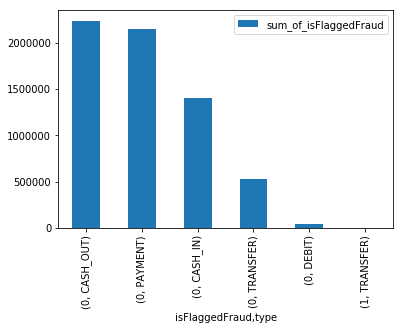

,isFlaggedFraud,type,sum_of_isFlaggedFraud
0,0,CASH_OUT,2237500
1,0,PAYMENT,2151495
2,0,CASH_IN,1399284
3,0,TRANSFER,532893
4,0,DEBIT,41432
5,1,TRANSFER,16


In [312]:
x=df.groupby(["isFlaggedFraud"])["type"].value_counts()
x=pd.DataFrame(data=x).rename(columns={"type":"sum_of_isFlaggedFraud"})
x.plot.bar()
plt.show()
x.reset_index(inplace=True)
x.head(len(x))

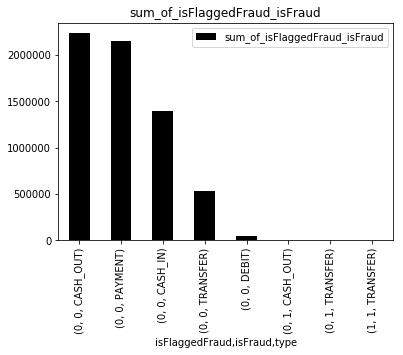

,isFlaggedFraud,isFraud,type,sum_of_isFlaggedFraud_isFraud
0,0,0,CASH_OUT,2233384
1,0,0,PAYMENT,2151495
2,0,0,CASH_IN,1399284
3,0,0,TRANSFER,528812
4,0,0,DEBIT,41432
5,0,1,CASH_OUT,4116
6,0,1,TRANSFER,4081
7,1,1,TRANSFER,16


In [313]:
x=df.groupby(["isFlaggedFraud","isFraud"])["type"].value_counts()
x=pd.DataFrame(data=x).rename(columns={"type":"sum_of_isFlaggedFraud_isFraud"})
x.plot.bar(subplots=True,color={"isFlaggedFraud":"red","isFraud":"green","sum_of_isFlaggedFraud_isFraud":"black"})
plt.show()
x.reset_index(inplace=True)
x.head(len(x))

In [375]:
data = df[(df.type == "CASH_OUT") | (df.type == "TRANSFER")]"Data Dictionary.txt"

In [376]:
print(df.shape)
print(data.shape)

(6362620, 11)
(2770409, 11)


In [339]:
data.groupby("type")["isFraud"].value_counts()

type      isFraud
CASH_OUT  0          2233384
          1             4116
TRANSFER  0           528812
          1             4097
Name: isFraud, dtype: int64

In [349]:
data.groupby("isFraud")["type"].value_counts()

isFraud  type    
0        CASH_OUT    2233384
         TRANSFER     528812
1        CASH_OUT       4116
         TRANSFER       4097
Name: type, dtype: int64

In [377]:

data.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.00,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.00,2719172.89,0,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.00,C1509514333,288800.00,2415.16,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.00,C824009085,70253.00,64106.18,0,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.00,C248609774,652637.00,6453430.91,0,0
51,1,CASH_OUT,23261.30,C2072313080,20411.53,0.00,C2001112025,25742.00,0.00,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.20,C1937962514,517.00,8383.29,0,0


In [380]:
print(data.groupby(["isFraud"])["oldbalanceDest"].max())

print(data.groupby(["isFraud"])["newbalanceDest"].max())

print(data.groupby(["isFraud"])["newbalanceOrig"].max())
print(data.groupby(["isFraud"])["oldbalanceOrg"].max())



isFraud
0    3.560159e+08
1    2.362305e+08
Name: oldbalanceDest, dtype: float64
isFraud
0    3.561793e+08
1    2.367265e+08
Name: newbalanceDest, dtype: float64
isFraud
0    43686616.33
1    49585040.37
Name: newbalanceOrig, dtype: float64
isFraud
0    43818855.30
1    59585040.37
Name: oldbalanceOrg, dtype: float64
